In [1]:
from sklearn import metrics
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
x_data, y_data = mnist.data, mnist.target.astype(int)

In [2]:
import platform

device = 'cpu'
if platform.system() == 'Darwin':
    device = 'cpu'
else:
    device = 'cuda'
print(device)

cuda


In [6]:
import torch
import torch.nn.functional as F
import torch.nn as nn


class MLP(torch.nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            # nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 42)
X_train, X_test = torch.Tensor(X_train.values), torch.Tensor(X_test.values)
y_train, y_test = torch.Tensor(y_train.values), torch.Tensor(y_test.values)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [8]:
lr = 0.001
epochs = 2000
model = MLP().to(device)

cirterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [9]:
loss_save_arr = []
for i in range(epochs):
    # train
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = cirterion(output, y_train.long())
    loss.backward()
    optimizer.step()
    loss_save_arr.append(loss.data)

    if(i % 100 == 0):
        print("====")
        print('epoch ', i)
        print('loss ', loss.data)
        _, pred = torch.max(output.data, axis = 1)
        print("train_accuracy {:0.3f}".format(float((pred == y_train).sum() / y_train.size(0))))

        # test
        model.eval()
        with torch.no_grad():
            output = model(X_test)
            _, pred = torch.max(output.data, axis = 1)
            print("test_accuracy {:0.03f}".format(float((pred == y_test).sum() / y_test.size(0))))



====
epoch  0
loss  tensor(14.7757, device='cuda:0')
train_accuracy 0.129
test_accuracy 0.172
====
epoch  100
loss  tensor(0.4250, device='cuda:0')
train_accuracy 0.883
test_accuracy 0.880
====
epoch  200
loss  tensor(0.3040, device='cuda:0')
train_accuracy 0.913
test_accuracy 0.905
====
epoch  300
loss  tensor(0.2463, device='cuda:0')
train_accuracy 0.928
test_accuracy 0.917
====
epoch  400
loss  tensor(0.2101, device='cuda:0')
train_accuracy 0.938
test_accuracy 0.925
====
epoch  500
loss  tensor(0.1844, device='cuda:0')
train_accuracy 0.946
test_accuracy 0.931
====
epoch  600
loss  tensor(0.1648, device='cuda:0')
train_accuracy 0.952
test_accuracy 0.935
====
epoch  700
loss  tensor(0.1492, device='cuda:0')
train_accuracy 0.957
test_accuracy 0.939
====
epoch  800
loss  tensor(0.1363, device='cuda:0')
train_accuracy 0.961
test_accuracy 0.940
====
epoch  900
loss  tensor(0.1255, device='cuda:0')
train_accuracy 0.964
test_accuracy 0.942
====
epoch  1000
loss  tensor(0.1161, device='cuda:

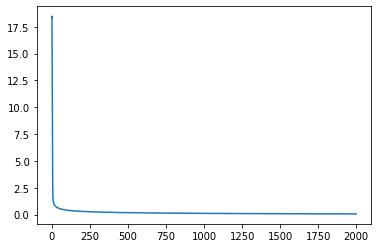

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(range(epochs), [e.to("cpu") for e in loss_save_arr])

In [11]:
import torchvision.models as models

torch.save(model.state_dict(), 'mnist_model.pth')

with torch.no_grad():
    output = model(X_test)
    _, pred = torch.max(output.data, axis = 1)
    print("test_accuracy {:0.03f}".format(float((pred == y_test).sum() / y_test.size(0))))

test_accuracy 0.954
